## Atividade: Otimização de Hiperparâmetros e Comparação de Modelos

- Aprendizagem de Máquina - 2025.1 - Centro de Informática - UFPE

- Rodrigo Rocha Moura (rrm2@cin.ufpe.br)

- Descrição da atividade: Realizar o treinamento, otimização e avaliação dos modelos K-NN, LVQ e SVM aplicados ao dataset Spotify Tracks, disponível no HuggingFace. O objetivo é compreender o impacto da seleção de hiperparâmetros na performance dos modelos e determinar qual deles apresenta melhor desempenho para esta tarefa de classificação.

- Links do dataset: https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset e hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv

## Tratamento dos Dados

Importando o pandas para manuseio de dataframe e importando a base de dados do Spotify:

In [114]:
import pandas as pd
df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

Visualização do dataframe antes de qualquer manipulação:

In [115]:
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


Observando o dataframe acima, podemos remover as colunas:

- **Unnamed: 0**, porque já temos o índice de cada linha;

- **track_id**, **artists**, **album_name** e **track_name**, porque são colunas de valores não numéricos e não serão úteis para o treinamento e classificação.

Portanto, removendo essas colunas citadas acima:

In [116]:
df.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'], inplace=True)

Convertendo a coluna **explicit** em valores numéricos:

In [117]:
df = pd.get_dummies(df, columns=['explicit'], dtype = int)

Checando se há valores ausentes no dataframe:

In [118]:
df1 = df.isnull().any()
df1

popularity          False
duration_ms         False
danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
time_signature      False
track_genre         False
explicit_False      False
explicit_True       False
dtype: bool

Como vemos acima, não há valores ausentes no dataframe.

Pegando somente 30% do dataframe por conta de complexidade nos treinamentos:

In [119]:
df = df.sample(frac=0.3, random_state=42)

Pegando as features e a variável alvo:

In [120]:
features = df.select_dtypes(include=['number'])
alvo = df['track_genre']

Padronizando os valores das features:

In [121]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)

Particionando os dados em conjuntos de treinamento, validação e teste:

In [122]:
from sklearn.model_selection import train_test_split
features_treino, features_teste, alvo_treino, alvo_teste = train_test_split(features, alvo, test_size = 0.3, random_state = 42)
features_treino1, features_valid, alvo_treino1, alvo_valid = train_test_split(features_treino, alvo_treino, test_size = 0.3, random_state = 42)

## Busca por Hiperparâmetros

Definindo o espaço de parâmetros para o KNN:

- Testaremos de 1 a 100 vizinhos;

- Duas opções para as escolhas dos pesos: Uniforme ou baseado na distância;

- Três distâncias disponíveis: Euclidiana, de Manhattan e de Minkowski;

In [123]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
parametros_KNN = {
    'n_neighbors': np.arange(1, 100),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

Definindo o espaço de parâmetros para o LVQ:

- **distance_type:** a função que calcula a distância;

- **activation_type:** a função de ativação;

- **solver_type:** o solver utilizado para otimização;

- **random_state:** a seed para o gerador de números aleatórios.

In [124]:
from sklvq import GLVQ

parametros_LVQ = {
    'distance_type': ['squared-euclidean', 'euclidean'],
    'activation_type': ['identity', 'sigmoid'],
    'solver_type': ['sgd', 'wgd', 'adam'],
    'random_state': [42]
}

Definindo o espaço de parâmetros para o SVM:

- **C:** parâmetro de regularização;

- **kernel:** tipos de kernel;

- **degree:** grau do polinômio (apenas para kernel='poly');

- **gamma:** coeficiente do kernel para 'rbf', 'poly' e 'sigmoid';

- **coef0:** termo independente em 'poly' e 'sigmoid;

- **shrinking:** se deve usar a heurística de encolhimento;

In [125]:
from scipy.stats import expon, loguniform
from sklearn.svm import SVC
parametros_SVM = {
    'C': loguniform(1e-3, 1e3),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'] + list(loguniform(1e-4, 1e-1).rvs(size=10)),
    'coef0': expon(scale=1.0),
    'shrinking': [True, False]
}

Utilizaremos o RandomizedSearchCV para a busca dos hiperparâmetros:

- Essa função usa por padrão um cross validation de **5-fold**;

- **n_iter:** Número de combinações a serem testadas;

- **scoring:** A estratégia de avaliação a cada iteração do cross validation é a acurácia;

- **verbose:** Escolhi 0 para esconder as mensagens printadas durante a execução da função.

In [126]:
knn = KNeighborsClassifier()
knn_random_search_cv = RandomizedSearchCV(
    knn,
    param_distributions=parametros_KNN,
    n_iter=3,
    scoring='accuracy',
    random_state=42,
    verbose=0
)

lvq = GLVQ()
lvq_random_search_cv = RandomizedSearchCV(
    lvq,
    param_distributions=parametros_LVQ,
    n_iter=3,
    scoring='accuracy',
    random_state=42,
    verbose=0
)

svm = SVC()
svm_random_search_cv = RandomizedSearchCV(
    svm,
    param_distributions=parametros_SVM,
    n_iter=3,
    scoring='accuracy',
    random_state=42,
    verbose=0
)

In [127]:
knn_random_search_cv.fit(features_treino1, alvo_treino1)
lvq_random_search_cv.fit(features_treino1, alvo_treino1)
svm_random_search_cv.fit(features_treino1, alvo_treino1)

c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
          

RandomizedSearchCV(estimator=SVC(), n_iter=3,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002C38BC67490>,
                                        'coef0': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002C38BC67E10>,
                                        'degree': [2, 3, 4],
                                        'gamma': ['scale', 'auto',
                                                  0.061717023981131304,
                                                  0.007429943706562201,
                                                  0.017348943349690896,
                                                  0.0013671141047933697,
                                                  0.004375159612271082,
                                                  0.017855922494828085,
                                                  0.02571578361764181,
                                                  0.0003301043311522884,
                                                  0.00022612353259850808,
                                                  0.000652431862164361],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid'],
                                        'shrinking': [True, False]},
                   random_state=42, scoring='accuracy')

Melhor configuração para cada modelo após a RandomizedSearchCV:

In [128]:
print("Melhores parâmetros do knn_random_search_cv:", knn_random_search_cv.best_params_)
print("\nMelhores parâmetros do lvq_random_search_cv:", lvq_random_search_cv.best_params_)
print("\nMelhores parâmetros do svm_random_search_cv:", svm_random_search_cv.best_params_)

Melhores parâmetros do knn_random_search_cv: {'weights': 'distance', 'n_neighbors': 20, 'metric': 'minkowski'}

Melhores parâmetros do lvq_random_search_cv: {'solver_type': 'sgd', 'random_state': 42, 'distance_type': 'euclidean', 'activation_type': 'sigmoid'}

Melhores parâmetros do svm_random_search_cv: {'C': 4.0428727350273315, 'coef0': 1.2312500617045903, 'degree': 3, 'gamma': 0.017348943349690896, 'kernel': 'poly', 'shrinking': False}


## Avaliação e Comparação

Resultados do KNN nos conjuntos de treinamento, validação e teste:

		Resultados no Treinamento (KNN)
Acurácia: 0.7202172096908939
Precisão: 0.7269762518061035
Recall: 0.7202172096908939
f1_score: 0.7208333550245084


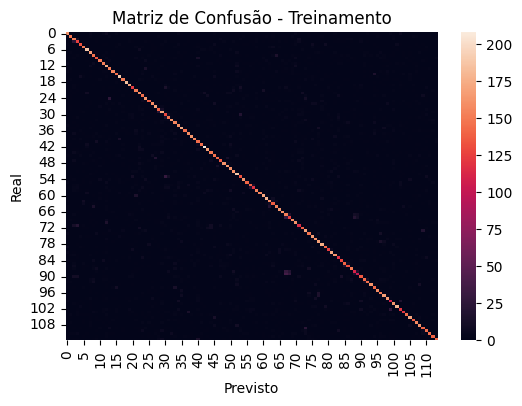

		Resultados na Validação (KNN)
Acurácia: 0.19200779727095516
Precisão: 0.192435615256394
Recall: 0.19200779727095516
f1_score: 0.18543458344096161


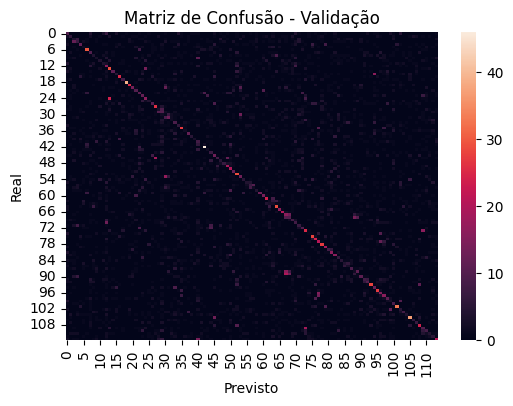

		Resultados no Teste (KNN)
Acurácia: 0.204775828460039
Precisão: 0.19999885001922904
Recall: 0.204775828460039
f1_score: 0.19633325426372183


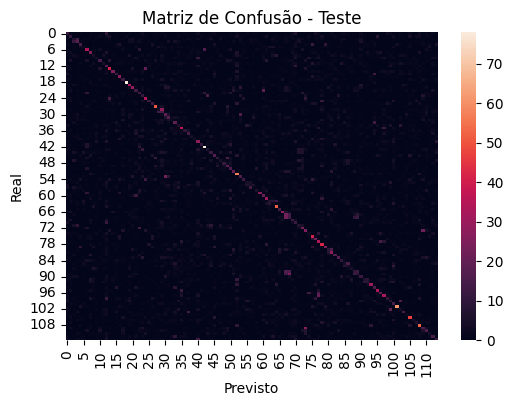

In [138]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
knn_treinado = knn_random_search_cv.best_estimator_
knn_treinado_previsao_treino = knn_treinado.predict(features_treino)
knn_treinado_previsao_valid = knn_treinado.predict(features_valid)
knn_treinado_previsao_teste = knn_treinado.predict(features_teste)

print("\t\tResultados no Treinamento (KNN)")
print("Acurácia: "+str(accuracy_score(alvo_treino, knn_treinado_previsao_treino)))
print("Precisão: "+str(precision_score(alvo_treino, knn_treinado_previsao_treino, average='weighted')))
print("Recall: "+str(recall_score(alvo_treino, knn_treinado_previsao_treino, average='weighted')))
print("f1_score: "+str(f1_score(alvo_treino, knn_treinado_previsao_treino, average='weighted')))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(alvo_treino, knn_treinado_previsao_treino))
plt.title("Matriz de Confusão - Treinamento")
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

print("\t\tResultados na Validação (KNN)")
print("Acurácia: "+str(accuracy_score(alvo_valid, knn_treinado_previsao_valid)))
print("Precisão: "+str(precision_score(alvo_valid, knn_treinado_previsao_valid, average='weighted')))
print("Recall: "+str(recall_score(alvo_valid, knn_treinado_previsao_valid, average='weighted')))
print("f1_score: "+str(f1_score(alvo_valid, knn_treinado_previsao_valid, average='weighted')))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(alvo_valid, knn_treinado_previsao_valid))
plt.title("Matriz de Confusão - Validação")
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

print("\t\tResultados no Teste (KNN)")
print("Acurácia: "+str(accuracy_score(alvo_teste, knn_treinado_previsao_teste)))
print("Precisão: "+str(precision_score(alvo_teste, knn_treinado_previsao_teste, average='weighted')))
print("Recall: "+str(recall_score(alvo_teste, knn_treinado_previsao_teste, average='weighted')))
print("f1_score: "+str(f1_score(alvo_teste, knn_treinado_previsao_teste, average='weighted')))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(alvo_teste, knn_treinado_previsao_teste))
plt.title("Matriz de Confusão - Teste")
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

Resultados do LVQ nos conjuntos de treinamento, validação e teste:

		Resultados no Treinamento (LVQ)
Acurácia: 0.1755221386800334
Precisão: 0.14175275841990953
Recall: 0.1755221386800334
f1_score: 0.14941534709789878


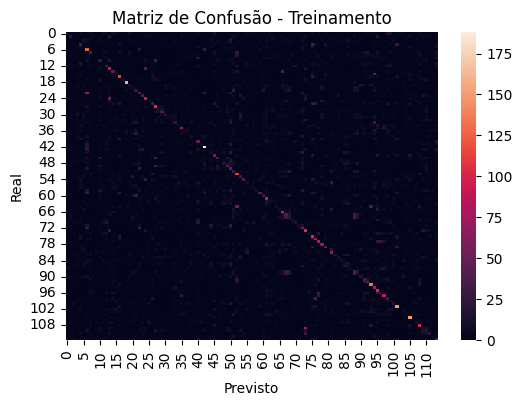

		Resultados na Validação (LVQ)
Acurácia: 0.16012252854358117
Precisão: 0.13008344491740192
Recall: 0.16012252854358117
f1_score: 0.1361843919364302


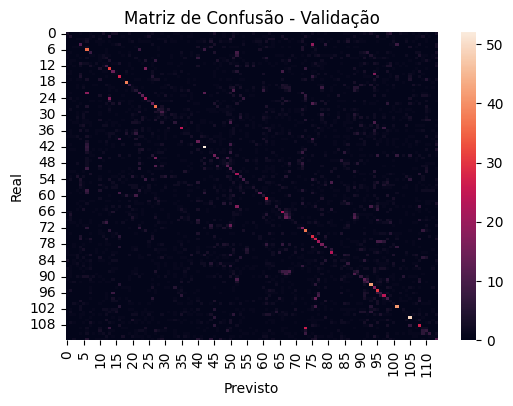

		Resultados no Teste (LVQ)
Acurácia: 0.1658869395711501
Precisão: 0.13358141421253716
Recall: 0.1658869395711501
f1_score: 0.1407043514066492


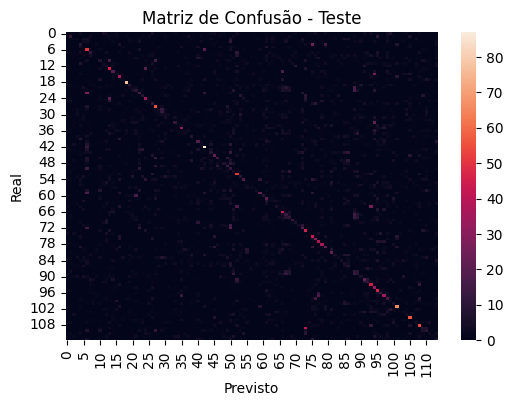

In [139]:
lvq_treinado = lvq_random_search_cv.best_estimator_
lvq_treinado_previsao_treino = lvq_treinado.predict(features_treino)
lvq_treinado_previsao_valid = lvq_treinado.predict(features_valid)
lvq_treinado_previsao_teste = lvq_treinado.predict(features_teste)

print("\t\tResultados no Treinamento (LVQ)")
print("Acurácia: "+str(accuracy_score(alvo_treino, lvq_treinado_previsao_treino)))
print("Precisão: "+str(precision_score(alvo_treino, lvq_treinado_previsao_treino, average='weighted')))
print("Recall: "+str(recall_score(alvo_treino, lvq_treinado_previsao_treino, average='weighted')))
print("f1_score: "+str(f1_score(alvo_treino, lvq_treinado_previsao_treino, average='weighted')))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(alvo_treino, lvq_treinado_previsao_treino))
plt.title("Matriz de Confusão - Treinamento")
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

print("\t\tResultados na Validação (LVQ)")
print("Acurácia: "+str(accuracy_score(alvo_valid, lvq_treinado_previsao_valid)))
print("Precisão: "+str(precision_score(alvo_valid, lvq_treinado_previsao_valid, average='weighted')))
print("Recall: "+str(recall_score(alvo_valid, lvq_treinado_previsao_valid, average='weighted')))
print("f1_score: "+str(f1_score(alvo_valid, lvq_treinado_previsao_valid, average='weighted')))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(alvo_valid, lvq_treinado_previsao_valid))
plt.title("Matriz de Confusão - Validação")
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

print("\t\tResultados no Teste (LVQ)")
print("Acurácia: "+str(accuracy_score(alvo_teste, lvq_treinado_previsao_teste)))
print("Precisão: "+str(precision_score(alvo_teste, lvq_treinado_previsao_teste, average='weighted')))
print("Recall: "+str(recall_score(alvo_teste, lvq_treinado_previsao_teste, average='weighted')))
print("f1_score: "+str(f1_score(alvo_teste, lvq_treinado_previsao_teste, average='weighted')))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(alvo_teste, lvq_treinado_previsao_teste))
plt.title("Matriz de Confusão - Teste")
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

Resultados do SVM nos conjuntos de treinamento, validação e teste:

		Resultados no Treinamento (SVM)
Acurácia: 0.31512113617376775
Precisão: 0.32155113781137235
Recall: 0.31512113617376775
f1_score: 0.29959132831730945


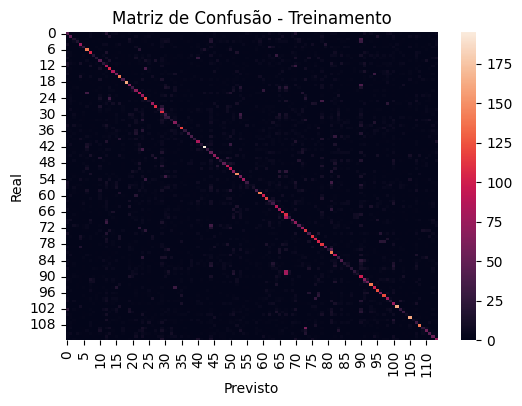

		Resultados na Validação (SVM)
Acurácia: 0.23043720412141463
Precisão: 0.2197014948579343
Recall: 0.23043720412141463
f1_score: 0.21288153154448583


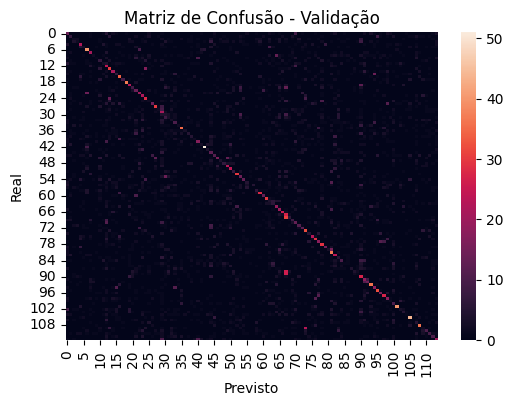

		Resultados no Teste (SVM)
Acurácia: 0.2379142300194932
Precisão: 0.2277718784758875
Recall: 0.2379142300194932
f1_score: 0.22030517595437416


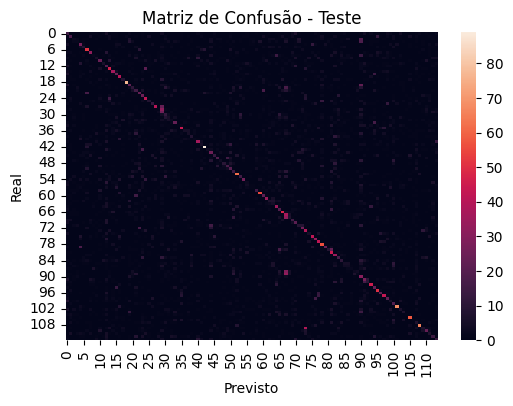

In [140]:
svm_treinado = svm_random_search_cv.best_estimator_
svm_treinado_previsao_treino = svm_treinado.predict(features_treino)
svm_treinado_previsao_valid = svm_treinado.predict(features_valid)
svm_treinado_previsao_teste = svm_treinado.predict(features_teste)

print("\t\tResultados no Treinamento (SVM)")
print("Acurácia: "+str(accuracy_score(alvo_treino, svm_treinado_previsao_treino)))
print("Precisão: "+str(precision_score(alvo_treino, svm_treinado_previsao_treino, average='weighted')))
print("Recall: "+str(recall_score(alvo_treino, svm_treinado_previsao_treino, average='weighted')))
print("f1_score: "+str(f1_score(alvo_treino, svm_treinado_previsao_treino, average='weighted')))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(alvo_treino, svm_treinado_previsao_treino))
plt.title("Matriz de Confusão - Treinamento")
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

print("\t\tResultados na Validação (SVM)")
print("Acurácia: "+str(accuracy_score(alvo_valid, svm_treinado_previsao_valid)))
print("Precisão: "+str(precision_score(alvo_valid, svm_treinado_previsao_valid, average='weighted')))
print("Recall: "+str(recall_score(alvo_valid, svm_treinado_previsao_valid, average='weighted')))
print("f1_score: "+str(f1_score(alvo_valid, svm_treinado_previsao_valid, average='weighted')))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(alvo_valid, svm_treinado_previsao_valid))
plt.title("Matriz de Confusão - Validação")
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

print("\t\tResultados no Teste (SVM)")
print("Acurácia: "+str(accuracy_score(alvo_teste, svm_treinado_previsao_teste)))
print("Precisão: "+str(precision_score(alvo_teste, svm_treinado_previsao_teste, average='weighted')))
print("Recall: "+str(recall_score(alvo_teste, svm_treinado_previsao_teste, average='weighted')))
print("f1_score: "+str(f1_score(alvo_teste, svm_treinado_previsao_teste, average='weighted')))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(alvo_teste, svm_treinado_previsao_teste))
plt.title("Matriz de Confusão - Teste")
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

## Considerações Finais

Ao observarmos os resultados expostos acima, podemos concluir que nenhum dos três modelos (KNN, LVQ e SVM) são aplicáveis ao contexto da base Spotify Track Genre, pois não tiveram bons desempenhos.

Diante dos resultados, o SVM teve um melhor desempenho, seguido do KNN e a pior performance foi do LVQ.

Por fim, é necessário também destacar o overfitting no resultado de treinamento do KNN.